# Teorica

Hoy vamos a ver basicamente el capitulo 3 del libro de McElreath

## Repaso

#### Bayes:
$\theta$ (vector de $n$ dimensiones)  
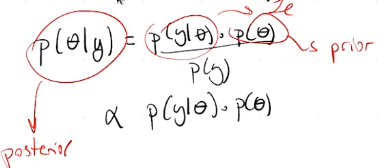

#### Tecnicas para calcular el posterior
+ Analitica $\rightarrow$ prior conjugado:  
  + prior conjugado:
    + Posterior, prior y likelihood son de la misma familia
    + Data recolectada previamente
    + Priors "no informativos": pueden "interpretar la likelihood como una probabilidad"
  + $P(\sigma, \mu|y)$ sólo dependía de 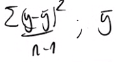

+ Otra tecnica:
  + $P(\theta|y) \alpha P(y|\theta)P(\theta)$
  + $P(\theta|y) \alpha L(y|\theta)P(\theta)$ donde   
  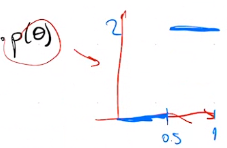  
  $P(\theta=0.2|y) = 0$  
  (1/c viene de $\alpha$)  
  $P(\theta=0.8|y) = \frac{1}{c} L(y|\theta=0.8)2$    
  $\rightarrow$ compu $\rightarrow$
  $P(\theta=0.8|y) = \frac{\mu P(\theta=0.8)}{c}$

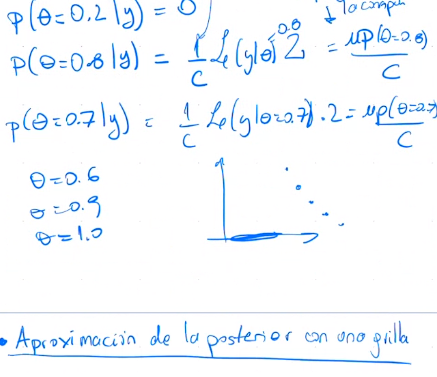

## Grid-sampling

In [ ]:
# Binomial

# Likelihood:
# N tiradas, y éxitos:

#L = comb(n, y) * theta ^ y * (1 - theta) ^ (N-y)

# Data sintética
# ...

# Prior
# ...

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

In [37]:
intentos = 10
exitos = stats.binom.rvs(p = 0.3, n = intentos) # la proba verdadera (la que no conocemos)
# devuelve la cantidad de aciertos
exitos

1

In [38]:
def uniform_prior(theta):
    if not 0 <= theta <= 1:
        raise ValueError
    return 1

In [39]:
def binomial_likelihood(theta, y, n): #por ahora hacemos asi, depues vamos a ver una mejor forma de encontrarla
    return comb(n, y) * theta ** y * (1 - theta) ** (n-y)

In [40]:
# posterior para theta = 0.4
# posterior = prior * likelihood / C

C_posterior_04 = uniform_prior(0.4) * binomial_likelihood(0.4, exitos, intentos)

In [41]:
C_posterior_04

0.04031078399999999

In [44]:
theta_i = 0.09
C_posterior_i = uniform_prior(theta_i) * binomial_likelihood(theta_i, exitos, intentos)
C_posterior_i

0.38513682011680966

In [45]:
theta_grid = np.linspace(0, 1, 1000)
C_posterior = []
for theta in theta_grid:
    C_posterior_i = uniform_prior(theta) * binomial_likelihood(theta, exitos, intentos)
    C_posterior.append(C_posterior_i)

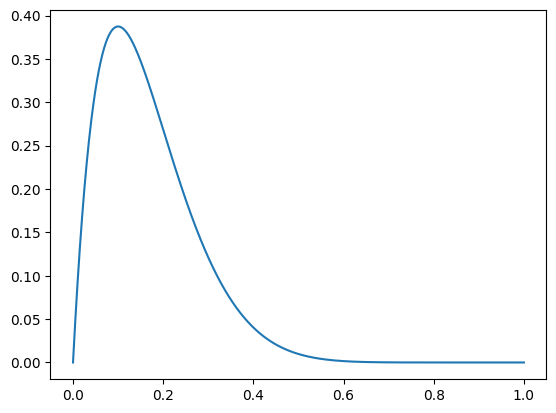

In [46]:
fig, ax = plt.subplots()
ax.plot(theta_grid, C_posterior)

Hay que asegurarse de que integre a 1

In [47]:
# sin librerias para calcular la integral:

posterior = C_posterior / sum(C_posterior[:-1] * np.diff(theta_grid))

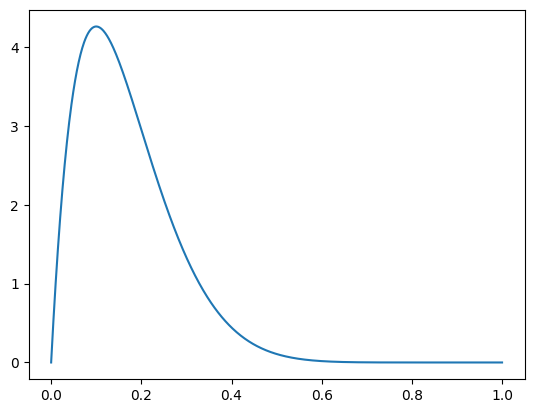

In [49]:
fig, ax = plt.subplots()
ax.plot(theta_grid, posterior)

Ya podemos hacer una funcion para calcular la posterior con cualquier prior

In [52]:
theta_gid = np.linspace(0, 1, 10000)
def posterior_binomial(theta_grid, exitos, intentos, prior):
    C_posterior = []
    for theta in theta_grid:
        C_posterior_i = prior(theta) * binomial_likelihood(theta, exitos, intentos)
        C_posterior.append(C_posterior_i)
    posterior = C_posterior / sum(C_posterior[:-1] * np.diff(theta_grid))
    return np.array(posterior)

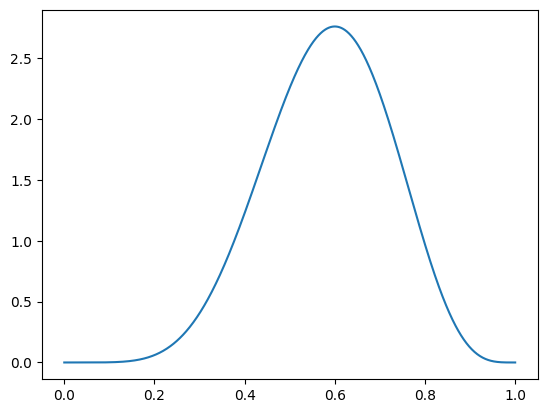

In [57]:
fig, ax = plt.subplots()
posterior = posterior_binomial(theta_grid, 6, 10, uniform_prior)
ax.plot(theta_grid, posterior)

In [55]:
def no_low_probabilities_prior(theta):
    if not 0 <= theta <= 1:
        raise ValueError()
    if theta < 0.5:
        return 0
    return 1

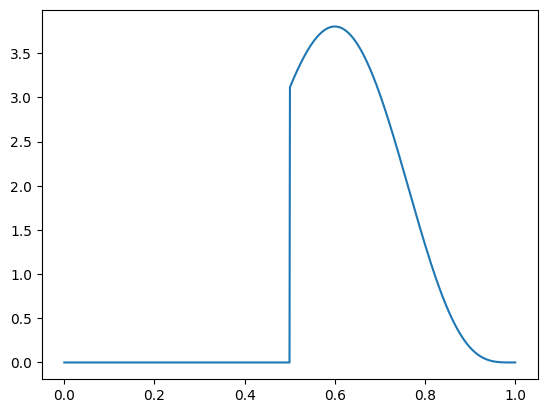

In [59]:
fig, ax = plt.subplots()
posterior = posterior_binomial(theta_grid, 6, 10, no_low_probabilities_prior)
ax.plot(theta_grid, posterior)

In [63]:
#np.random.choice(theta_grid, p=posterior) # probabilities do not sum to 1

samples = np.random.choice(theta_grid, p=posterior/sum(posterior), size = 1_000)

(0.0, 1.0)

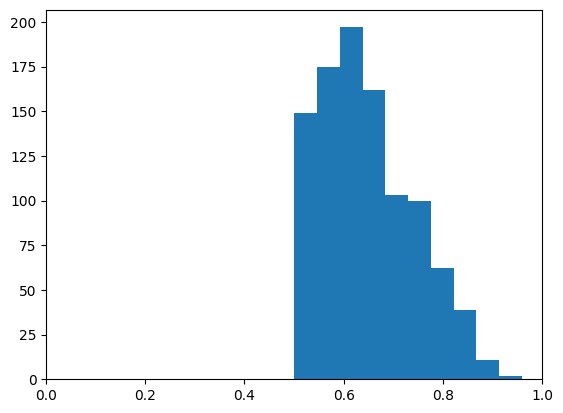

In [64]:
fig, ax = plt.subplots()
ax.hist(samples)
ax.set_xlim(0, 1)

Igual a la posterior

In [67]:
np.mean(samples) # media de la distribucion

0.6486346346346346

In [68]:
np.median(samples) # mediana de la dist

0.6346346346346347

In [69]:
np.quantile(samples, q = 0.9)

0.7818818818818819

In [71]:
# bootstrap no parametrico, sobre la posterior

means = []
for i in range(1000):
    samples = np.random.choice(theta_grid, p=posterior/sum(posterior), size = 1_000)
    means.append(np.mean(samples))

(array([ 10.,  25.,  78., 135., 198., 239., 170.,  83.,  51.,  11.]),
 array([0.6390971 , 0.64084895, 0.6426008 , 0.64435265, 0.6461045 ,
        0.64785636, 0.64960821, 0.65136006, 0.65311191, 0.65486376,
        0.65661562]),
 <BarContainer object of 10 artists>)

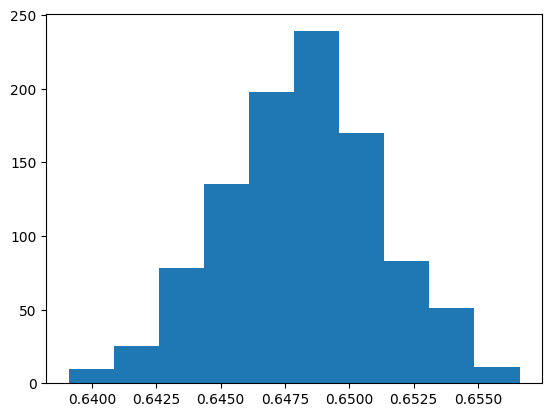

In [72]:
plt.hist(means)

Samplear la posterior nos sirve para resolver el problema:

In [73]:
# p(y_moño | y) = integral  dtheta p(y_moño | theta) * p (theta|y)

Si yo voy a tirar una moneda, cual es la P(cara)?  
podria decir P = media de la dist con bootstrap, pero seria un error

Asi si:

In [74]:
samples = np.random.choice(theta_grid, p=posterior/sum(posterior), size = 1_000)

In [81]:
caras = np.sum(np.random.random(size= len(samples)) < samples)

In [83]:
probabilidad_cara = caras / len(samples)
probabilidad_cara

0.643

Esto es la posterior predictive

Ahora veamos el problema de grid-samples

puedo calcular la distribucion de distintos estadisticos (media, mediana, stds, cuantiles, etc),  
uno de los problemas de la aproximacion por grilla es

(0.98, 1.0)

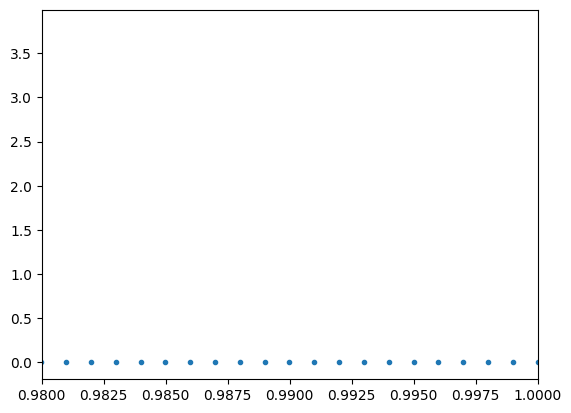

In [85]:
fig, ax = plt.subplots()
ax.plot(theta_grid, posterior, ".")
ax.set_xlim(0.98, 1)

Por que calcule todos estos puntos si no hacen nada?  
El grid-sample calcula toda la postirior siempre  
La solucion la vamos a ver en un para de clases

## Tarea
Replicar todo esto con la distribucion normal

# Práctica

Gabi es tímido, a que es más problabe que se dedique, computación o abogacía?

$\theta = $ Gabi se dedica a la computación/informática  
$y = $ Gabi es una persona tímida  
$\overline\theta = $ abogacía

$P(\theta|y)$ vs $P(\overline\theta|y)$

$|abo|= 161351$    
$|info|= 23000$  

$P(\theta) = 0.125$

$P(\overline\theta) = 0.875$

$P(y|\theta) = 0.4$

$P(y| \overline\theta) = 0.2$

Bayes:  

$P(\theta|y) = \frac{P(y|\theta)P(\theta)}{P(y|\theta)P(\theta) + P(y|\overline\theta)P(\overline\theta)} = 0.22$  

$P(\overline\theta|y) = 0.78$

Nos dió cualquiera

**La nueva evidencia** (Gabi es timido) **no determina completamente nuestro conocimiento de la situacion sino que actualiza conocimiento previo**

## Teorema de Bayes

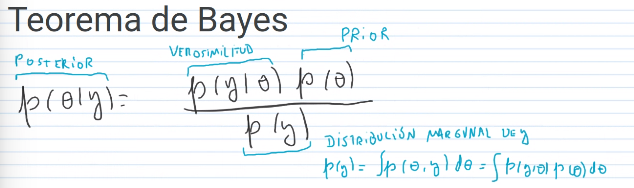



La prior predictiva no depende del valor de $\theta$

Me perdí, agregar el resto, Ale lo sube